In [63]:
import pandas as pd 
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

In [64]:
world_data = pd.read_csv('../Data/our-world-can.csv')
world_data = world_data.rename(columns={'Entity': 'Country', 'total_tests': 'Number of Tests Performed', \
'142601-annotations': 'Testing Done', 'Total confirmed deaths due to COVID-19': 'Deaths', 'Total confirmed cases of COVID-19': 'Cases'})
world_data = world_data.drop(columns=['Code', 'Testing Done'])
world_data = world_data.fillna(0)


In [65]:
world_data

,Country,Day,Number of Tests Performed,Deaths,Cases
0,2020 Summer Olympics athletes & staff,2021-06-19,0.0,0.0,1.0
1,2020 Summer Olympics athletes & staff,2021-06-20,0.0,0.0,1.0
2,2020 Summer Olympics athletes & staff,2021-06-21,0.0,0.0,1.0
3,2020 Summer Olympics athletes & staff,2021-06-22,0.0,0.0,1.0
4,2020 Summer Olympics athletes & staff,2021-06-23,0.0,0.0,1.0
...,...,...,...,...,...
105718,Zimbabwe,2021-07-19,0.0,2697.0,85732.0
105719,Zimbabwe,2021-07-20,0.0,2747.0,88415.0
105720,Zimbabwe,2020-03-20,0.0,0.0,1.0
105721,Zimbabwe,2020-03-21,0.0,0.0,3.0


In [66]:
can = world_data[world_data['Country'] == 'Canada']
usa = world_data[world_data['Country'] == 'United States']

usa = usa.drop([98765,98764,98763,98762])

In [67]:
can_pivot = can.pivot_table(index = 'Day', values = ['Cases', 'Deaths', 'Number of Tests Performed', 'Country'], aggfunc='sum').reset_index()
usa_pivot = usa.pivot_table(index = 'Day', values = ['Cases', 'Deaths', 'Number of Tests Performed', 'Country'], aggfunc='sum').reset_index()

In [73]:
can_pivot = can_pivot.drop(columns='Day')
can_pivot.insert(1, 'Day', usa_pivot['Day'], True)

In [74]:
can_pivot

,Cases,Day,Deaths,Number of Tests Performed
0,1.0,2020-01-22,0.0,0.0
1,1.0,2020-01-23,0.0,0.0
2,2.0,2020-01-24,0.0,0.0
3,2.0,2020-01-25,0.0,0.0
4,2.0,2020-01-26,0.0,0.0
...,...,...,...,...
537,1430127.0,2021-07-16,26450.0,37747547.0
538,1430437.0,2021-07-17,26452.0,37794221.0
539,1430740.0,2021-07-18,26457.0,37798244.0
540,1431378.0,2021-07-19,26466.0,37907486.0


In [75]:
usa_pivot

,Day,Cases,Deaths,Number of Tests Performed
0,2020-01-22,1.0,0.0,0.0
1,2020-01-23,1.0,0.0,0.0
2,2020-01-24,2.0,0.0,0.0
3,2020-01-25,2.0,0.0,0.0
4,2020-01-26,5.0,0.0,0.0
...,...,...,...,...
537,2021-07-16,34054952.0,608815.0,478457652.0
538,2021-07-17,34067912.0,608884.0,0.0
539,2021-07-18,34079960.0,609019.0,0.0
540,2021-07-19,34132071.0,609231.0,0.0


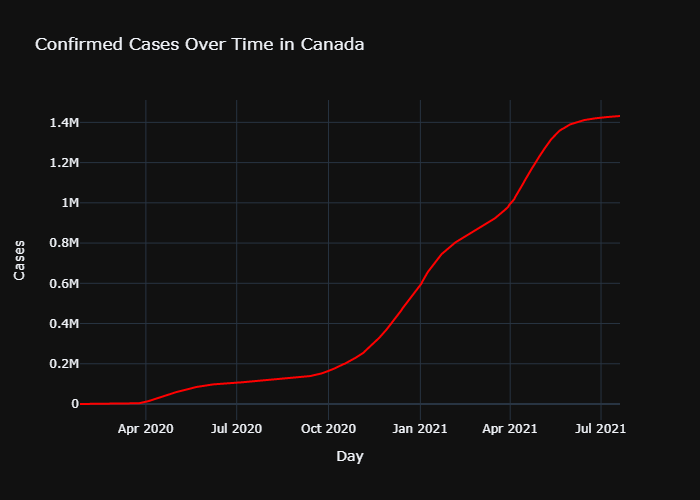

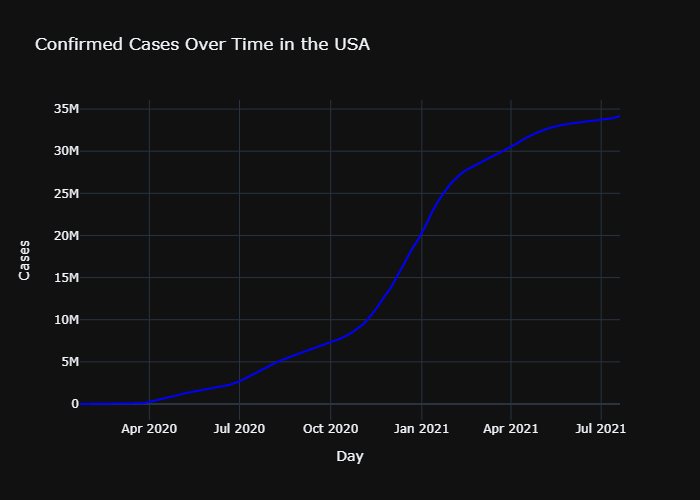

In [70]:
fig = px.line(can_pivot, x = "Day", y = "Cases",
             template = "plotly_dark", title = "Confirmed Cases Over Time in Canada",
              color_discrete_sequence = ['Red'])
fig.show()

fig = px.line(usa_pivot, x = "Day", y = "Cases",
             template = "plotly_dark", title = "Confirmed Cases Over Time in the USA",
              color_discrete_sequence = ['Blue'])
fig.show()